# Toyota Innovation Challenge Machine Vision Workshop (Python + OpenCV)

CHANGELOG:
- 09.29.2022
  - added [Processing Videos with OpenCV](#process-videos-opencv) example
- 05.11.2023
  - added [Deep Learning Resources](#deep-learning-resources) for those interested
- 05.11.2023
  - added [Python Depth Camera](#python-depth-camera) section for those interested
- 05.12.2023
  - added [Machine Vision Overview slides](https://www.dropbox.com/s/ojm3k3q19xv8wjf/Machine%20Vision%20Overview.pptx?dl=0)
- 05.13.2023
  - added virtual machine instructions to [Python Depth Camera](#python-depth-camera) section for those interested. This might be easier to setup than WSL.
- 09.19.2023
  - added link to a deep learning tutorial in the [Deep Learning Resources](#deep-learning-resources) section
- 10.27.2023
  - Fall 2023 Hackathon Discord: https://discord.gg/2JprMKEXGt

<br></br>

Maintained by: Sagar Rajendran, IDEAs Clinic

<br></br>

In this notebook we'll explore some of the fundamentals of machine vision using OpenCV, a popular real-time computer vision library. You will learn how to:

- load images/video files
- interface with the Orbecc Astra camera to capture images and videos in real-time
- process image frames using basic OpenCV operations (cropping, rotating, colour thresholding etc.)

For a brief introduction on classicial machine vision vs. deep learning based techniques, check out this [Machine Vision Overview PowerPoint slide deck](https://www.dropbox.com/s/ojm3k3q19xv8wjf/Machine%20Vision%20Overview.pptx?dl=0).

<br></br>

If the Python programming language is new to you, you can go through the notebooks at the following link to familiarize yourself with the basic concepts: [Introduction to Python](https://github.com/computationalcore/introduction-to-python).

If you're unfamiliar with Google Colab (Jupyter Notebooks), have a read through the information at this link: [Google Colab Tutorial](https://www.tutorialspoint.com/google_colab/your_first_colab_notebook.htm).

<p>
 The estimated time needed to go through this notebook: <strong>20-30 minutes</strong>. All you need to do is run each cell and examine the outputs generated. These code snippets can serve as foundations for your hackathon solutions.
</p>

<br></br>

<b>Before getting started, save a copy of this notebook into your Google Drive like so: </b>

![](https://drive.google.com/uc?export=view&id=1EipVpyH2_0ssyvQkdlyiahW-v9WNQfhR)

# Table of Contents
1. [Mounting Google Drive to Save Files](#mountGoogleDrive)
2. [Importing Relevant Libraries and Downloading Sample Images](#importLibs)
3. [Basic Operations](#Basicops)
    - [Convert](#conv)
    - [Colorspaces](#clsp)
    - [Resize](#res)
    - [Flip](#flip)
    - [Rotate](#flip)
    - [Crop](#crp)
4. [Image Segmentation/Object Detection](#img-seg)
    - [Point Detect](#point-detect)
    - [Line Detect](#line-detect)
    - [Edge Detect](#edge-detect)
    - [Hough Transform](#hough-transform)
    - [Color based object detection](#color-detect)
    - [Shape based object detection](#color-detect)
5. [Camera Image Capture](#camera-image-capture)
6. [Camera Video Capture](#camera-video-capture)
7. [Realtime Video Processing (Face Detection)](#realtime-processing-face-detection)
8. [Processing Videos with OpenCV](#process-videos-opencv)



References:
- https://colab.research.google.com/drive/1iepzNI_lF1hQ9MLruwnmuHiB3YHNhwb9?pli=1#scrollTo=jx5f2SnOMhpf
- https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/1-Fundamentals.ipynb#scrollTo=htK6mm-Gebe2
- https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=ZpA68lTrcvZs

## 1. Mounting Google Drive to Save Files <a name="mountGoogleDrive"></a>

First, run the cell below to mount Google Drive so that we can save any files captured in this notebook there. Click 'Connect to Google Drive', select your Google Account and then click 'Allow'. This will mount your Google Drive at path '/content/gdrive'.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

# Download the test image
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg

# Download other Sample Images
!wget --no-check-certificate \
    https://raw.githubusercontent.com/MeAmarP/sample_imgs/master/wiki_shapes.jpg \
    -O wiki_shapes.jpg

!wget --no-check-certificate \
    https://raw.githubusercontent.com/MeAmarP/sample_imgs/master/indian_coins.jpg \
    -O indian_coins.jpg

### Convert Colorspaces: <a name="clsp"></a>

### Resize Image <a name="res"></a>

In [ ]:
@interact_manual(angle_val=widgets.IntSlider(min=0, max=360, step=5, value=10))
def rotate_img(angle_val):
    path_to_img = 'noidea.jpg'
    scaleFactor = 1
    img = cv2.imread(path_to_img,cv2.IMREAD_UNCHANGED)
    rows,cols,_ = img.shape
    imgCenter = (cols-1)/2.0,(rows-1)/2.0
    #Calculate an affine matrix of 2D rotation.
    rotateMat = cv2.getRotationMatrix2D(imgCenter,angle_val,scaleFactor)
    # Apply an affine transformation to an image.
    out_img = cv2.warpAffine(img,rotateMat,(cols,rows))
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) ,plt.title('Original Image',color='c')
    plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(out_img,cv2.COLOR_BGR2RGB)), plt.title('Rotated Image',color='c')
    plt.show()

## 4. Image Segmentation:<a name="img-seg"></a>

### Point Detect <a name="point-detect"></a>

### Line Detection <a name="line-detect"></a>

In [ ]:

path_to_img = 'noidea.jpg'

hori_line_mat = np.float32([[-1,-1,-1],
                            [2,2,2],
                            [-1,-1,-1]])

verti_line_mat = np.float32([[-1,2,-1],
                            [-1,2,-1],
                            [-1,2,-1]])
def lineDetector(path_to_img,kernel):
    img = cv2.imread(path_to_img)
    img_out = cv2.filter2D(img,-1,kernel)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img_out,cv2.COLOR_BGR2RGB)),plt.title('Transformed',color='c')
    plt.show()
    return
lineDetector(path_to_img,verti_line_mat)

In [ ]:


path_to_img = 'noidea.jpg'
algo_edgedetect = ['sobel', 'prewitt','canny','roberts','scharr']
def edgeDetector(path_to_img,algo_edgedetect=None):
    img = cv2.imread(path_to_img)
    if algo_edgedetect == 'canny':
        img_edge = cv2.Canny(img,100,200)
    if algo_edgedetect == 'sobel':
        img_edge = cv2.Sobel(img,-1,1,0,ksize=-1)
    if algo_edgedetect == 'prewitt':
        prewitt_kernel_h = np.array([[1,1,1],
                                    [0,0,0],
                                    [-1,-1,-1]])
        prewitt_kernel_v = np.array([[-1,0,1],
                                    [-1,0,1],
                                    [-1,0,1]])
        prewitt_h = cv2.filter2D(img,-1,prewitt_kernel_h)
        prewitt_v = cv2.filter2D(img,-1,prewitt_kernel_v)
        img_edge = prewitt_h + prewitt_v
    if algo_edgedetect == 'roberts':
        roberts_kernel_h = np.array([[-1,0],[0,1]])
        roberts_kernel_v = np.array([[0,-1],[1,0]])
        roberts_h_ele = cv2.filter2D(img,-1,roberts_kernel_h)
        roberts_v_ele = cv2.filter2D(img,-1,roberts_kernel_v)
        img_edge = roberts_h_ele + roberts_v_ele
    if algo_edgedetect == 'scharr':
        # img_gaussian = cv2.GaussianBlur(img,(3,3),5)
        # img_edge = cv2.Laplacian(img_gaussian,-1)
        img_edge = cv2.Scharr(img,-1,1,0)
    # print(img_edge.dtype0
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Output',color='c')
    plt.show()
    return
edgeDetector(path_to_img,algo_edgedetect='scharr')



### Hough Transforms:<a name="hough-transform"></a>

In [ ]:
# Line Detection
def houghLineDetector(path_to_img):
    img = cv2.imread(path_to_img)
    img_edge = cv2.Canny(img,80,200)
    lines = cv2.HoughLinesP(img_edge,5,np.pi/180,20,minLineLength=50,maxLineGap=10)
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Output',color='c')
    plt.show()
    return

def houghCircleDetector(path_to_img):
    img = cv2.imread(path_to_img)
    img = cv2.medianBlur(img,3)
    img_edge = cv2.Canny(img,100,200)

    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT,1,minDist=20,param1=200,param2=70)
    circles = np.uint16(np.around(circles))
    for val in circles[0,:]:
        cv2.circle(img,(val[0],val[1]),val[2],(255,0,0),2)

    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(cv2.cvtColor(img_edge,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

path_to_img = 'indian_coins.jpg'

#houghLineDetector(path_to_img)
houghCircleDetector(path_to_img)

In [ ]:
#HSV Based
def detectColorObjects(path_to_img,find_color=None):
    img =cv2.imread(path_to_img)
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    if find_color == 'red':
        Red1Lower = np.array([0,90,100])
        Red1Upper = np.array([10,255,255])
        #(170-180)
        Red2Lower = np.array([170,90,100])
        Red2Upper = np.array([180,255,255])
        img_mask1 = cv2.inRange(img_hsv,Red1Lower,Red1Upper)
        img_mask2 = cv2.inRange(img_hsv,Red2Lower,Red2Upper)
        img_mask = img_mask1+img_mask2
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    if find_color == 'green':
        GreenLower = np.array([40,100,100])
        GreenUpper = np.array([80,255,255])
        img_mask = cv2.inRange(img_hsv,GreenLower,GreenUpper)
        masked_out = cv2.bitwise_and(img,img,mask=img_mask)
    return img,img_mask


def markDetectdObjects(og_img,masked_img):
    # Find Blue Contours
    (contours,_)=cv2.findContours(masked_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    FinImg = og_img.copy()
    for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if(area):
            x,y,w,h = cv2.boundingRect(contour)
            # FinImg = cv2.rectangle(og_img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(FinImg,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0))
            # BaseCord = np.array([x+h+round(w/2), y+h+round(w/2)])
    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(masked_img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.subplot(133),plt.imshow(cv2.cvtColor(FinImg,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.show()
    return

path_to_img = 'noidea.jpg'
img,maskedImg =detectColorObjects(path_to_img,find_color='red')
markDetectdObjects(img,maskedImg)

### Shape object detection <a name="shape-detect"></a>

In [ ]:
#Shape Detection
path_to_img = 'wiki_shapes.jpg'
def detectShapes(img_path):
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    _,img_Otsubin = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    contours,_ = cv2.findContours(img_Otsubin.copy(),1,2)
    for num,cnt in enumerate(contours):
        x,y,w,h = cv2.boundingRect(cnt)
        approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
        # print(num, approx)
        if len(approx) == 3:
            cv2.putText(img,"Triangle",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
        if len(approx) == 4:
            cv2.putText(img,"Rect",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)
        if len(approx) > 10:
            cv2.putText(img,"Circle",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
            cv2.drawContours(img,[cnt],-1,(0,255,0),2)

    plt.figure(figsize=(20,10))
    plt.subplot(131),plt.imshow(cv2.cvtColor(img_Otsubin,cv2.COLOR_BGR2RGB)),plt.title('Input',color='c')
    plt.subplot(132),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result')
    plt.subplot(133),plt.imshow(cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)),plt.title('Original')
    plt.show()
    return

detectShapes(path_to_img)

## 5. Camera Image Capture <a name="camera-image-capture"></a>
Using a webcam to capture images for processing on the runtime. If you have the Orbecc Astra camera plugged in for this, it will be used. Otherwise, your computer's internal webcam will be used.

Below are a few helper function to make converting between different image data types and formats easier.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

### Webcam Images
Running code on images taken from a webcam is fairly straight-forward. We will utilize code within Google Colab's **Code Snippets** that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for **Camera Capture** to utilize your computer's webcam (or the Orbecc Astra Camera, if it's plugged in).

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  #faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  #for (x,y,w,h) in faces:
  #    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

## 6. Camera Video Capture <a name="camera-video-capture"></a>
Using a webcam to capture video for processing on the runtime. If you have the Orbecc Astra camera plugged in for this, it will be used. Otherwise, your computer's internal webcam will be used.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def re_encode_video(video_path):
    print(f"Re-encoding video, this might take some time, please be patient.")
    #added -r 30, otherwise, for some reason it records 1000FPS as metadata for the Astra
    os.system(f"ffmpeg -y -i {video_path} -vcodec libx264 -r 30 temp.mp4")
    os.system(f"rm {video_path}")
    os.system(f"mv temp.mp4 {video_path}")
    print(f"Done encoding!")

def record_video(filename='video.mp4'):
  js = Javascript("""
    async function recordVideo() {
      // mashes together the advanced_outputs.ipynb function provided by Colab,
      // a bunch of stuff from Stack overflow, and some sample code from:
      // https://developer.mozilla.org/en-US/docs/Web/API/MediaStream_Recording_API

      // Optional frames per second argument.
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");
      capture.textContent = "Start Recording";
      capture.style.background = "green";
      capture.style.color = "white";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      // create a media recorder instance, which is an object
      // that will let you record what you stream.
      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);
      // Video is a media element.  This line here sets the object which serves
      // as the source of the media associated with the HTMLMediaElement
      // Here, we'll set it equal to the stream.
      video.srcObject = stream;
      // We're inside an async function, so this await will fire off the playing
      // of a video. It returns a Promise which is resolved when playback has
      // been successfully started. Since this is async, the function will be
      // paused until this has started playing.
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // and now, just wait for the capture button to get clicked in order to
      // start recording
      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);
      // use a promise to tell it to stop recording
      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();

      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
      return btoa(binaryString);
    }
    """)
  try:
    display(js)
    data = eval_js('recordVideo({})')
    binary = b64decode(data)
    with open(filename, "wb") as video_file:
      video_file.write(binary)
    print(
        f"Finished recording video. Saved binary under filename in current working directory: {filename}"
    )
    '''
    unfortunately, webcam capture is not that clean in Colab and the videos need to
    be re-encoded to play properly. This takes some time.
    '''
    re_encode_video(filename)
  except Exception as err:
      # In case any exceptions arise
      print(str(err))
  return filename

In [ ]:
record_video("video.mp4") # call the record_video function

In [ ]:
# Run the function, get the video path as saved in your notebook, and play it back here.
from IPython.display import HTML
from base64 import b64encode

def show_video(video_path, video_width = 640, reencode = False):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

video_path = "video.mp4"
show_video(video_path)

## 7. Realtime Image Processing (Face Detection) <a name="realtime-processing-face-detection"></a>
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (in this example, face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream. You can do something similar for your hackathon solution.

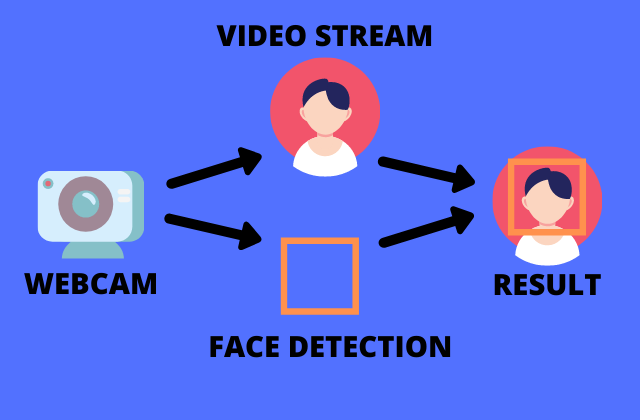</center>

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0

# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

That's all for now! Hopefully this gives an overview of basic Python, OpenCV and Google Colab functionality.

...I lied, more snippets:

## 8. Processing Videos with OpenCV <a name="process-videos-opencv"></a>

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

# Initiate video capture for video file. video.mp4 should be in your working directory
cap = cv2.VideoCapture(r'video.mp4')

width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

res=(int(width), int(height))

fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec: this format should play in Chrome/Colab
out_filename = "output.mp4"
out = cv2.VideoWriter(out_filename, fourcc, 30.0, res)

print(f"Processing video.")

frame = None
while cap.isOpened():

    is_success, frame = cap.read()

    if not is_success:
        break

    #Do some image processing here. As an example, do point detection

    kernel = np.float32([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    processed_frame = cv2.filter2D(frame,-1,kernel)

    out.write(processed_frame) #write the processed images to an mp4 file
    # last_frame = processed_frame.copy()

out.release()

print(f"Done! Saved in working directory with name {out_filename}")
# OPTIONAL: show last processed frame.
# if True:
#   print(f"Showing last frame of video.")
#   cv2_imshow(last_frame)

cap.release()

re_encode_video("output.mp4") #for some reason the codecs from OpenCV fourcc don't play nicely with Colab, so re-encode
show_video("output.mp4", video_width= 640)

## 9. Deep Learning Resources <a name="deep-learning-resources"></a>

Below are some resources related to deep learning models for those interested. These methods/models are generally more advanced than classical image processing techniques and have shown great performance for a wide variety of image segmentation problems. Links are provided below but you will likely need to research further (and install a few dependencies). Try using Google and ChatGPT :)

[Facebook SAM (Segment Anything Model)](https://ai.facebook.com/blog/segment-anything-foundation-model-image-segmentation/) / [GitHub](https://github.com/facebookresearch/segment-anything)

[MMDetection](https://arxiv.org/abs/2112.01527) / [GitHub](https://github.com/open-mmlab/mmdetection/tree/master)

[YOLOv5](https://github.com/ultralytics/yolov5) - this framework is useful for training your own models

[Deep Learning Tutorial developed by Benjamin Zaionz at the IDEAs clinic](https://colab.research.google.com/drive/1vpIwHJ0gcxAnR3zOO6L1YQqhMC8IIaaW?usp=sharing) - this tutorial goes step by step into using a popular deep learning library, Keras



## 10. Using the Depth Camera with Python <a name="python-depth-camera"></a>

Within Colab, currently you cannot use the depth camera (if you're adventurous, you can try to get this working, the support team will be very impressed and grateful). If you'd like to make use of the depth camera, you'll have to setup an environment locally on your own computer. We provide documentation outlining this process in WSL2 on Windows 11 or via a virtual machine (written by a former co-op student). This should also work on native Ubuntu. macOS hasn't been tested.

[Orbecc Depth Camera Setup in WSL2/Ubuntu](https://www.dropbox.com/s/4l3ayqkd5hn9gr7/Ubuntu%20Python%20Documentation%20for%20Depth%20Camera.docx?dl=0)

[Orbecc Depth Camera Setup with a Virtual Machine](https://www.dropbox.com/s/iyzs51otviwmbd9/VM%20Ware%20virtual%20Machine%20Python%20Depth%20Camera.pdf?dl=0)